    Created : 2Feb2021
        Update: 5Feb2021
            Review: 27Oct2021

## Importing modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import time

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold

In [2]:
df = pd.read_csv('creditcard.csv')
X = df.drop('Class', axis=1)
y = pd.DataFrame(df['Class'])

# EDA

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
pd.set_option('max_columns', None)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
print(y.describe().round(decimals=2))

           Class
count  284807.00
mean        0.00
std         0.04
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


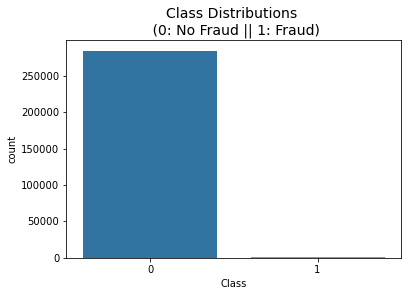

In [8]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [9]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


The amount of each class is greatly imbalanced, only 0.17% of the dataset belongs to the other class. We will over-sample the minority class with SMOTE later on. [Synthetic Minority OverSampling]    

In [10]:
## The following are the distribution of feature attributes

In [11]:
X.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

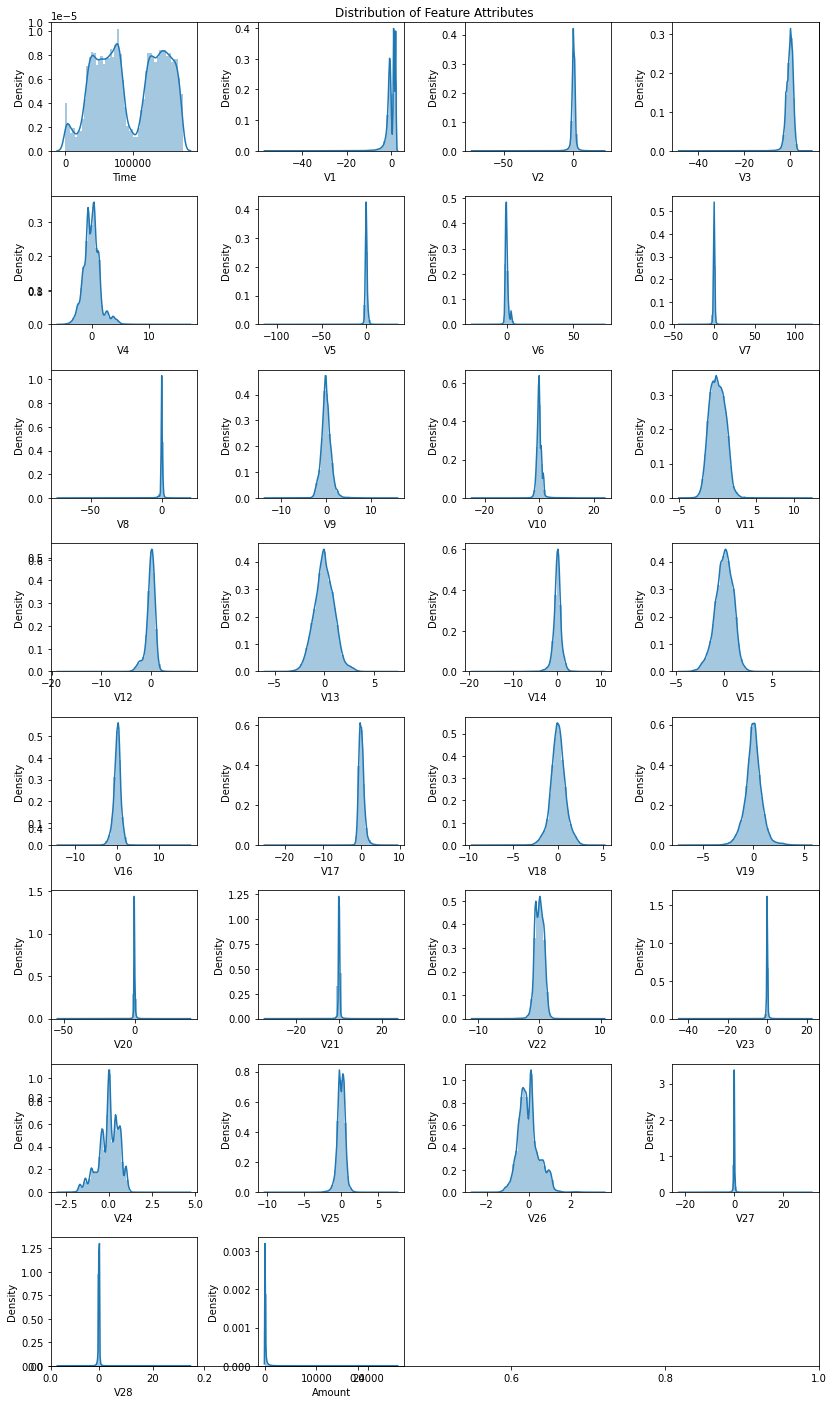

In [12]:
fig = plt.figure(figsize=(12,20))
plt.title('Distribution of Feature Attributes')
for i in range(len(X.columns)):
    fig.add_subplot(8,4,i+1)
    sns.distplot(X.iloc[:,i].dropna())
    plt.xlabel(X.columns[i])

plt.tight_layout()
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


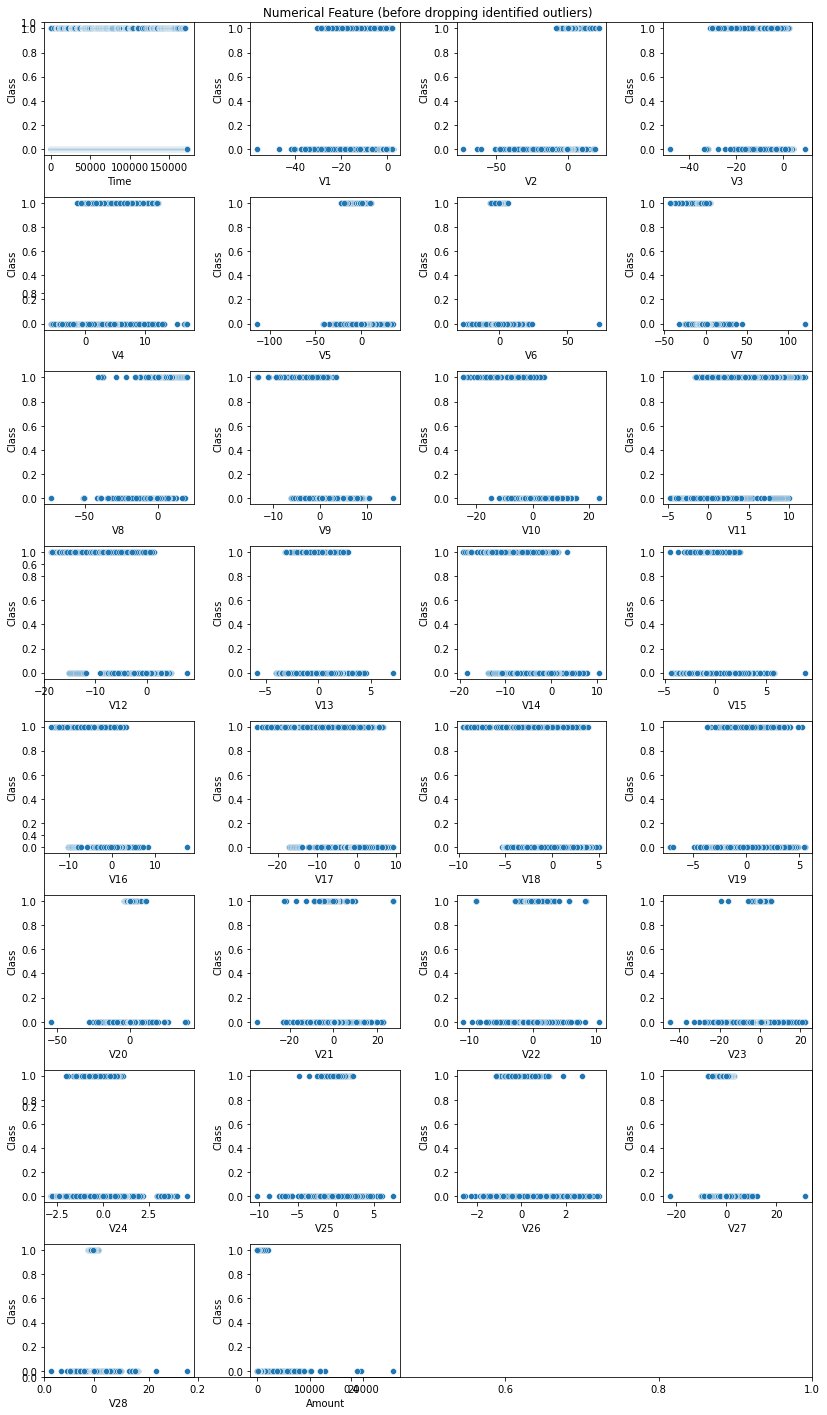

In [13]:
fig = plt.figure(figsize=(12,20))
plt.title('Numerical Feature (before dropping identified outliers)')
for i in range(len(X.columns)):
    fig.add_subplot(8,4,i+1)
    sns.scatterplot(X.iloc[:,i], y.iloc[:,0])
    plt.xlabel(X.columns[i])

plt.tight_layout()
plt.show()

In [14]:
correlation = X.corr()

<Figure size 3240x2160 with 0 Axes>

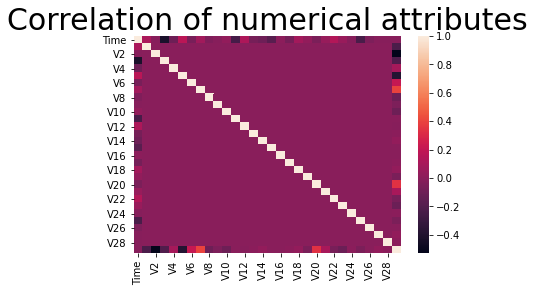

<Figure size 3240x2160 with 0 Axes>

In [22]:
# plt.subplot(figsize=(10,18))
sns.heatmap(correlation)
plt.title('Correlation of numerical attributes', size=30)
plt.figure(figsize=(45,30))
plt.show()

In [23]:
y_corr = pd.DataFrame(X.corrwith(y.Class),columns=["Correlation with target variable"])
y_corr_sorted= y_corr.sort_values(by=['Correlation with target variable'],ascending=False)
y_corr_sorted

,Correlation with target variable
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413
V19,0.034783
V20,0.020090
V8,0.019875
V27,0.017580
V28,0.009536
Amount,0.005632


In [25]:
y.Class.values.shape

(284807,)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


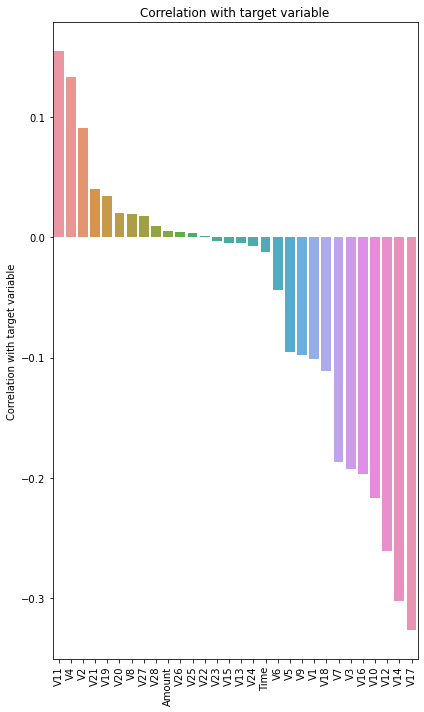

In [26]:
fig = plt.figure(figsize=(6,10))
plt.title('Correlation with target variable')
a=sns.barplot(y_corr_sorted.index,y_corr_sorted.iloc[:,0],data=y_corr)
a.set_xticklabels(labels=y_corr_sorted.index,rotation=90)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


In [28]:
from imblearn.over_sampling import SMOTE
resampling_method = SMOTE()

X_train_resampled, y_train_resampled = resampling_method.fit_resample(X_train, y_train)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


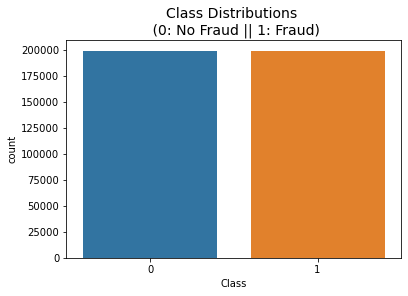

No Frauds: 199005 data points
Frauds Data points Before SMOTE: 492
Frauds Data points After SMOTE: 199005 data points


In [29]:
sns.countplot('Class', data=y_train_resampled)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()
print('No Frauds:', round(y_train_resampled['Class'].value_counts()[0]), 'data points')

print('Frauds Data points Before SMOTE:', round(df['Class'].value_counts()[1]))
print('Frauds Data points After SMOTE:', round(y_train_resampled['Class'].value_counts()[1]), 'data points')

In [30]:
Fraud_obs_added = round((y_train_resampled['Class'].value_counts()[1])-df['Class'].value_counts()[1])
print('Frauds Data points Added:',Fraud_obs_added , 'data points')

Frauds Data points Added: 198513 data points


In [31]:
print('No Frauds:', round(y_train_resampled['Class'].value_counts()[0]/len(y_train_resampled) * 100,2), '% of the dataset')
print('Frauds:', round(y_train_resampled['Class'].value_counts()[1]/len(y_train_resampled) * 100,2), '% of the dataset')

No Frauds: 50.0 % of the dataset
Frauds: 50.0 % of the dataset


In [32]:
y_corr = pd.DataFrame(X_train_resampled.corrwith(y_train_resampled.Class),columns=["Correlation with target variable"])
y_corr_sorted= y_corr.sort_values(by=['Correlation with target variable'],ascending=False)
y_corr_sorted

,Correlation with target variable
V4,0.752299
V11,0.725845
V2,0.540001
V19,0.298014
V20,0.166978
V21,0.164190
V28,0.101597
V27,0.095446
V26,0.071665
V8,0.054966


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


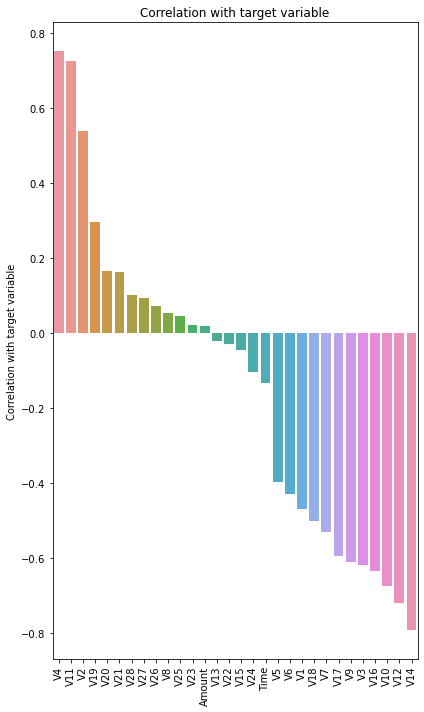

In [33]:
fig = plt.figure(figsize=(6,10))
plt.title('Correlation with target variable')
a=sns.barplot(y_corr_sorted.index,y_corr_sorted.iloc[:,0],data=y_corr)
a.set_xticklabels(labels=y_corr_sorted.index,rotation=90)
plt.tight_layout()
plt.show()

## Modelling

We shall now train the model. Gridsearch, together wih K-fold, will be used to find the best hyperparameters that can fit the model to the data. The training data will be trained using the following algorithms:

Logistic Regression (Lasso),
Logistic Regression (Ridge),
Decision Tree Classifier,
Decision Tree Classifier (with bagging),
Random Forest Classifier,
Support Vector Classifier.

In [34]:
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer,roc_curve

resampling = SMOTE(random_state=4)
roc_auc = make_scorer(roc_auc_score)

In [35]:
training_cv_list={}
training_cv_best_auc={}

test_best_auc = {}
test_best_classification_report={}
test_confusion_matrix={}

# Logistic Regression
## Ridge and Lasso

In [36]:
from sklearn.linear_model import LogisticRegression

model_name = "Logistics Regression (Ridge)"
model=LogisticRegression(max_iter=4000, penalty="l2")

param_grid = [{model_name+'__C':[0.01,0.1,1,10,100]}]

best training param: {'Logistics Regression (Ridge)__C': 1}
best training score 0.9335595615180831


test auc roc: 0.9736576378233122
test confusion matrix: 
 [[83647  1663]
 [   10   123]]
test classification report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85310
           1       0.07      0.92      0.13       133

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443



Text(0.5, 1.0, 'ROC Plot: Logistics Regression (Ridge)')

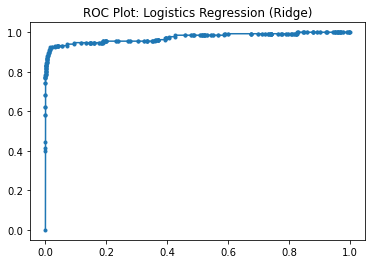

In [37]:
#LR
pipeline = Pipeline([('SMOTE', resampling), (model_name, model)])


clf=GridSearchCV(pipeline,param_grid,cv=5, scoring=roc_auc, n_jobs=-1)
clf.fit(X_train,y_train.to_numpy())


#Record the best grid search paramters into the list.
training_cv_list[model_name]=clf
training_cv_best_auc[model_name]=clf.best_score_



#print out the best param and best score 
print('best training param:',clf.best_params_)
print('best training score', clf.best_score_)
print('\n')

#make prediction on X_test
pred_prob_y = clf.predict_proba(X_test)
pred_y = clf.predict(X_test)

#compute auc, classification report,confusion matrix 
aucroc = roc_auc_score(y_test,pred_prob_y[:,1])
confusionmatrix = confusion_matrix(y_test,pred_y)
classificationreport = classification_report(y_test,pred_y)
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_y[:,1])

#store results
test_best_auc[model_name]=aucroc
test_best_classification_report[model_name]=confusionmatrix
test_confusion_matrix[model_name]=classificationreport

#print results
print('test auc roc:',aucroc)
print('test confusion matrix: \n',confusionmatrix)
print('test classification report \n', classificationreport)
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Plot: '+model_name)

In [38]:
model_name = "Logistics Regression (Ridge)"
model=LogisticRegression(max_iter=4000, penalty="l1",solver='liblinear')

param_grid = [{model_name+'__C':[0.01,0.1,1,10,100]}]


best training param: {'Logistics Regression (Ridge)__C': 0.01}
best training score 0.9373771101606078


test auc roc: 0.9734838796675194
test confusion matrix: 
 [[84530   780]
 [   13   120]]
test classification report 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85310
           1       0.13      0.90      0.23       133

    accuracy                           0.99     85443
   macro avg       0.57      0.95      0.61     85443
weighted avg       1.00      0.99      0.99     85443



Text(0.5, 1.0, 'ROC Plot: Logistics Regression (Ridge)')

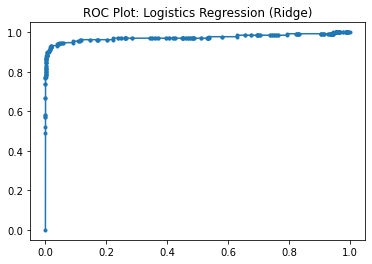

In [39]:
pipeline = Pipeline([('SMOTE', resampling), (model_name, model)])


clf=GridSearchCV(pipeline,param_grid,cv=5, scoring=roc_auc, n_jobs=-1)
clf.fit(X_train,y_train.to_numpy())


#Record the best grid search paramters into the list.
training_cv_list[model_name]=clf
training_cv_best_auc[model_name]=clf.best_score_
#print out the best param and best score 
print('best training param:',clf.best_params_)
print('best training score', clf.best_score_)
print('\n')

#make prediction on X_test
pred_prob_y = clf.predict_proba(X_test)
pred_y = clf.predict(X_test)

#compute auc, classification report,confusion matrix 
aucroc = roc_auc_score(y_test,pred_prob_y[:,1])
confusionmatrix = confusion_matrix(y_test,pred_y)
classificationreport = classification_report(y_test,pred_y)
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_y[:,1])

#store results
test_best_auc[model_name]=aucroc
test_best_classification_report[model_name]=confusionmatrix
test_confusion_matrix[model_name]=classificationreport

#print results
print('test auc roc:',aucroc)
print('test confusion matrix: \n',confusionmatrix)
print('test classification report \n', classificationreport)
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Plot: '+model_name)

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model_name = 'DecisionTreeClassifier'
param_grid = [{model_name+'__'+'splitter':['best','random'],model_name+'__'+'max_depth':[1,2,3,5,10,20]}]

best training param: {'DecisionTreeClassifier__max_depth': 5, 'DecisionTreeClassifier__splitter': 'best'}
best training score 0.92536045228769


test auc roc: 0.9552713103823912
test confusion matrix: 
 [[84421   889]
 [   15   118]]
test classification report 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85310
           1       0.12      0.89      0.21       133

    accuracy                           0.99     85443
   macro avg       0.56      0.94      0.60     85443
weighted avg       1.00      0.99      0.99     85443



Text(0.5, 1.0, 'ROC Plot: DecisionTreeClassifier')

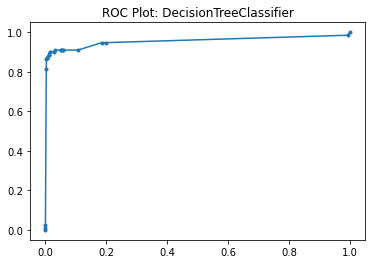

In [41]:
pipeline = Pipeline([('SMOTE', resampling), (model_name, model)])

clf=GridSearchCV(pipeline,param_grid,cv=5, scoring=roc_auc, n_jobs=-1)
clf.fit(X_train,y_train.to_numpy())


#Record the best grid search paramters into the list.
training_cv_list[model_name]=clf
training_cv_best_auc[model_name]=clf.best_score_
#print out the best param and best score 
print('best training param:',clf.best_params_)
print('best training score', clf.best_score_)
print('\n')

#make prediction on X_test
pred_prob_y = clf.predict_proba(X_test)
pred_y = clf.predict(X_test)

#compute auc, classification report,confusion matrix 
aucroc = roc_auc_score(y_test,pred_prob_y[:,1])
confusionmatrix = confusion_matrix(y_test,pred_y)
classificationreport = classification_report(y_test,pred_y)
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_y[:,1])

#store results
test_best_auc[model_name]=aucroc
test_best_classification_report[model_name]=confusionmatrix
test_confusion_matrix[model_name]=classificationreport

#print results
print('test auc roc:',aucroc)
print('test confusion matrix: \n',confusionmatrix)
print('test classification report \n', classificationreport)
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Plot: '+model_name)


# Decision Tree with Bagging

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

model_name = 'BaggingDecisionTreeClassifier'
model=BaggingClassifier(DecisionTreeClassifier())

param_grid = [{model_name+'__'+'base_estimator__splitter': ['best','random'],
              model_name+'__'+'base_estimator__max_depth':np.arange(1,5)
              }]

best training param: {'BaggingDecisionTreeClassifier__base_estimator__max_depth': 4, 'BaggingDecisionTreeClassifier__base_estimator__splitter': 'best'}
best training score 0.9233741119109824


test auc roc: 0.9712865859408808
test confusion matrix: 
 [[82536  2774]
 [   14   119]]
test classification report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85310
           1       0.04      0.89      0.08       133

    accuracy                           0.97     85443
   macro avg       0.52      0.93      0.53     85443
weighted avg       1.00      0.97      0.98     85443



Text(0.5, 1.0, 'ROC Plot: BaggingDecisionTreeClassifier')

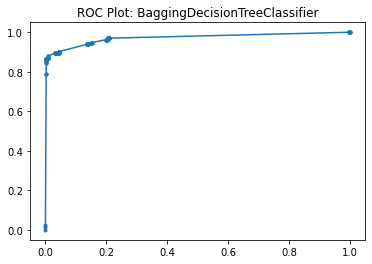

In [43]:
pipeline = Pipeline([('SMOTE', resampling), (model_name, model)])


clf=GridSearchCV(pipeline,param_grid,cv=5, scoring=roc_auc, n_jobs=-1)
clf.fit(X_train,y_train.to_numpy())


#Record the best grid search paramters into the list.
training_cv_list[model_name]=clf
training_cv_best_auc[model_name]=clf.best_score_
#print out the best param and best score 
print('best training param:',clf.best_params_)
print('best training score', clf.best_score_)
print('\n')

#make prediction on X_test
pred_prob_y = clf.predict_proba(X_test)
pred_y = clf.predict(X_test)

#compute auc, classification report,confusion matrix 
aucroc = roc_auc_score(y_test,pred_prob_y[:,1])
confusionmatrix = confusion_matrix(y_test,pred_y)
classificationreport = classification_report(y_test,pred_y)
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_y[:,1])

#store results
test_best_auc[model_name]=aucroc
test_best_classification_report[model_name]=confusionmatrix
test_confusion_matrix[model_name]=classificationreport

#print results
print('test auc roc:',aucroc)
print('test confusion matrix: \n',confusionmatrix)
print('test classification report \n', classificationreport)
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Plot: '+model_name)

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model_name = 'RandomForestClassifier'

param_grid = {
    model_name+'__'+'max_depth':[1,2,3,5,10,20]
                }



best training param: {'RandomForestClassifier__max_depth': 3}
best training score 0.9238586203451373


test auc roc: 0.9689587642767685
test confusion matrix: 
 [[84779   531]
 [   18   115]]
test classification report 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85310
           1       0.18      0.86      0.30       133

    accuracy                           0.99     85443
   macro avg       0.59      0.93      0.65     85443
weighted avg       1.00      0.99      1.00     85443



Text(0.5, 1.0, 'ROC Plot: RandomForestClassifier')

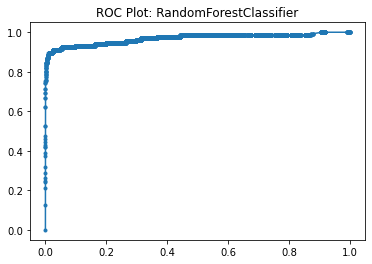

In [48]:
pipeline = Pipeline([('SMOTE', resampling), (model_name, model)])


clf=GridSearchCV(pipeline,param_grid,cv=5, scoring=roc_auc, n_jobs=-1)
clf.fit(X_train,y_train.to_numpy())


#Record the best grid search paramters into the list.
training_cv_list[model_name]=clf
training_cv_best_auc[model_name]=clf.best_score_
#print out the best param and best score 
print('best training param:',clf.best_params_)
print('best training score', clf.best_score_)
print('\n')

#make prediction on X_test
pred_prob_y = clf.predict_proba(X_test)
pred_y = clf.predict(X_test)

#compute auc, classification report,confusion matrix 
aucroc = roc_auc_score(y_test,pred_prob_y[:,1])
confusionmatrix = confusion_matrix(y_test,pred_y)
classificationreport = classification_report(y_test,pred_y)
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_y[:,1])

#store results
test_best_auc[model_name]=aucroc
test_best_classification_report[model_name]=confusionmatrix
test_confusion_matrix[model_name]=classificationreport

#print results
print('test auc roc:',aucroc)
print('test confusion matrix: \n',confusionmatrix)
print('test classification report \n', classificationreport)
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Plot: '+model_name)

In [49]:
best_auc_score = pd.DataFrame.from_dict(test_best_auc,orient='index')
best_auc_score

,0
Logistics Regression (Ridge),0.973484
DecisionTreeClassifier,0.955271
BaggingDecisionTreeClassifier,0.971287
RandomForestClassifier,0.968959
